In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [59]:
df = pd.read_csv('netflix_titles.csv',quotechar='"',escapechar='\\',on_bad_lines='skip',engine='python')

In [18]:
df = df[['title', 'type', 'rating', 'duration', 'listed_in']].dropna()

In [26]:
df['is_movie'] = df['duration'].str.contains('min').astype(int)
movies = df[df['is_movie'] == 1].copy()
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)

In [30]:
#encoding primary genre 
movies['genre'] = movies['listed_in'].apply(lambda x: x.split(',')[0])
genre_encoder = LabelEncoder()
movies['genre_encoded'] = genre_encoder.fit_transform(movies['genre'])

In [32]:
#encoding ratings 
rating_encoder = LabelEncoder()
movies['rating_encoded'] = rating_encoder.fit_transform(movies['rating'])

In [35]:
X_movies = movies[['rating_encoded', 'duration', 'genre_encoded']]

,rating_encoded,duration,genre_encoded
0,4,90,6
6,3,91,2
7,8,125,7
9,4,104,4
12,8,127,7
...,...,...,...
8801,8,96,7
8802,5,158,5
8804,5,88,4
8805,3,88,2


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_movies)

array([[-1.31673639, -0.33891703,  0.10182239],
       [-1.81487306, -0.3035575 , -0.86675523],
       [ 0.6758103 ,  0.89866664,  0.3439668 ],
       ...,
       [-0.81859972, -0.4096361 , -0.38246642],
       [-1.81487306, -0.4096361 , -0.86675523],
       [-0.32046305,  0.40363317,  0.3439668 ]])

In [43]:
from sklearn.cluster import KMeans

#choosing too small k might mix different movies together, big k might split similar movies
kmeans = KMeans(n_clusters=5, random_state=77)
movies['cluster'] = kmeans.fit_predict(X_scaled)

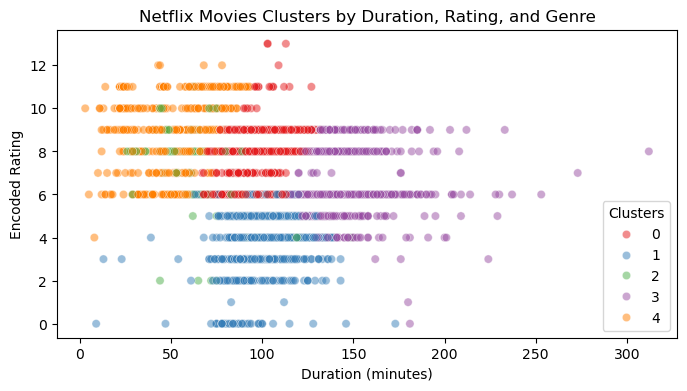

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.scatterplot(
    x='duration',
    y='rating_encoded',
    hue='cluster',
    data=movies,
    palette=sns.color_palette("Set1", n_colors=5),
    alpha=0.5)

plt.title("Netflix Movies Clusters by Duration, Rating, and Genre")
plt.xlabel("Duration (minutes)")
plt.ylabel("Encoded Rating")
plt.legend(title='Clusters')
plt.show()

In [58]:
movies.groupby('cluster').agg({
    'duration': ['mean', 'min', 'max'],
    'rating_encoded': ['mean', 'min', 'max'],
    'genre': lambda x: x.value_counts().index[0] })

duration           rating_encoded                             genre
               mean  min  max           mean min max                  <lambda>
cluster                                                                       
0         97.762411   64  132       7.790337   6  13                    Dramas
1        100.705784    9  173       4.391546   0   6                  Comedies
2         72.038544   26  149       7.342612   2  11           Stand-Up Comedy
3        140.711370  113  312       6.416910   0   9                    Dramas
4         52.086806    3   93       9.017361   4  12  Children & Family Movies